In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.15.0


In [3]:
#reading the dataFrame
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
#splitting the dataframe
X= df.drop(columns = 'Exited', axis=1)
y= df['Exited']

In [8]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
#one hot encoding for categorical data
geography = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [11]:
#feature editing
X=X.drop(columns = ['Geography', 'Gender'], axis =1)
X= X.drop(columns = 'Surname', axis =1)
X=pd.concat([X, gender, geography], axis =1)

In [15]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.25174609,  0.22629415, -1.92542853, ...,  0.90911166,
        -0.57658047, -0.57388614],
       [ 0.51580642, -1.36854296,  0.61612769, ...,  0.90911166,
        -0.57658047, -0.57388614],
       [-0.99504186,  0.62492325,  1.4460236 , ..., -1.09997489,
        -0.57658047, -0.57388614],
       ...,
       [ 1.65344746,  0.17853452,  0.05594795, ...,  0.90911166,
        -0.57658047, -0.57388614],
       [ 0.9815358 , -1.26518693, -0.57684768, ..., -1.09997489,
        -0.57658047, -0.57388614],
       [-0.2784285 , -0.42362732, -0.81544275, ..., -1.09997489,
         1.73436329, -0.57388614]])

In [19]:
X_test

array([[-1.09172229,  0.94740187, -0.62871617, ..., -1.09997489,
        -0.57658047,  1.74250594],
       [-0.04729644,  1.3846849 ,  0.12856384, ..., -1.09997489,
        -0.57658047,  1.74250594],
       [ 0.85574728,  1.57262778,  0.00407946, ..., -1.09997489,
         1.73436329, -0.57388614],
       ...,
       [ 1.05465254,  0.14690857,  0.4916433 , ..., -1.09997489,
        -0.57658047,  1.74250594],
       [-0.83356129, -0.44549217, -1.51048058, ...,  0.90911166,
         1.73436329, -0.57388614],
       [-1.62675664, -0.93031172,  0.63687509, ..., -1.09997489,
        -0.57658047, -0.57388614]])


ANN Implementation

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

## Creating our model

In [28]:
Classifier = Sequential()

In [29]:
#input layer
Classifier.add(Dense(units =11, activation= 'relu'))

In [30]:
Classifier.add(Dense(units =7, activation ='relu'))
Classifier.add(Dropout(0.5))
Classifier.add(Dense(units =6, activation = 'relu'))
Classifier.add(Dropout(0.5))
Classifier.add(Dense(units =1, activation= 'sigmoid'))
Classifier.add(Dropout(0.5))

In [31]:
Classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])

In [32]:
##Early Stopping
import tensorflow as tf

early_stopping = tf. keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [33]:
model_history= Classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs =30)

Epoch 1/30
536/536 [==============================] - 5s 7ms/step - loss: 3.3685 - accuracy: 0.5663 - val_loss: 0.5156 - val_accuracy: 0.7933
Epoch 2/30
536/536 [==============================] - 2s 5ms/step - loss: 2.5075 - accuracy: 0.6199 - val_loss: 0.5086 - val_accuracy: 0.7933
Epoch 3/30
536/536 [==============================] - 2s 4ms/step - loss: 2.3456 - accuracy: 0.6475 - val_loss: 0.5050 - val_accuracy: 0.7933
Epoch 4/30
536/536 [==============================] - 2s 4ms/step - loss: 2.2165 - accuracy: 0.6539 - val_loss: 0.5046 - val_accuracy: 0.7933
Epoch 5/30
536/536 [==============================] - 2s 4ms/step - loss: 2.0948 - accuracy: 0.6680 - val_loss: 0.5064 - val_accuracy: 0.7933
Epoch 6/30
536/536 [==============================] - 3s 6ms/step - loss: 2.0699 - accuracy: 0.7011 - val_loss: 0.5100 - val_accuracy: 0.7933
Epoch 7/30
536/536 [==============================] - 2s 4ms/step - loss: 2.0661 - accuracy: 0.6958 - val_loss: 0.5092 - val_accuracy: 0.7933
Epoch 

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

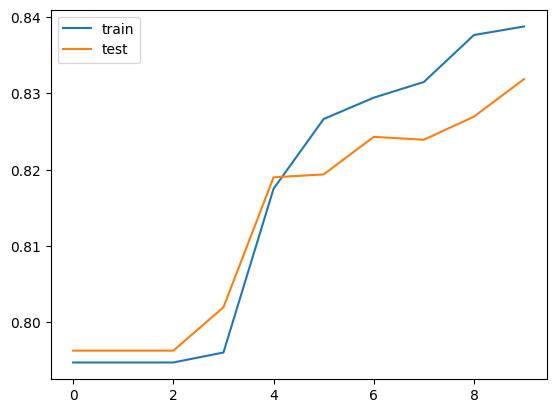

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

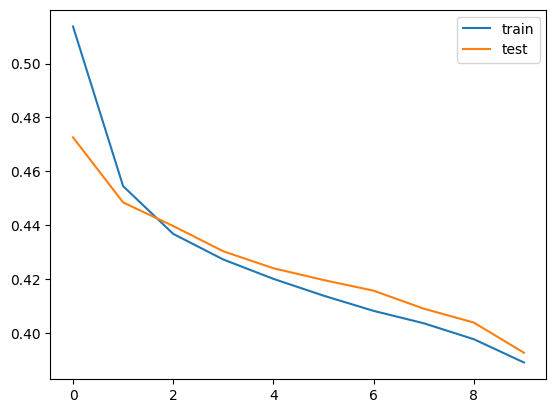

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()